In [18]:
import fishGenerator
import lcd
import LsfrGenerator
import random
import tests

n = 100000


sequence1 = [random.randint(0, 2**32) for _ in range(n)] #Вихрь Мерсенна
 
sequence2 = (lcd.linear_congruential_generator(n, seed=12345)) #линейный конгруэнтный метод

sequence3 = LsfrGenerator.lfsr.run(n) #регистр сдвига с линейной обратной связью

sequence4 = fishGenerator.fish.run(n) #fish

sequences = [sequence1, sequence2, sequence3, sequence4]



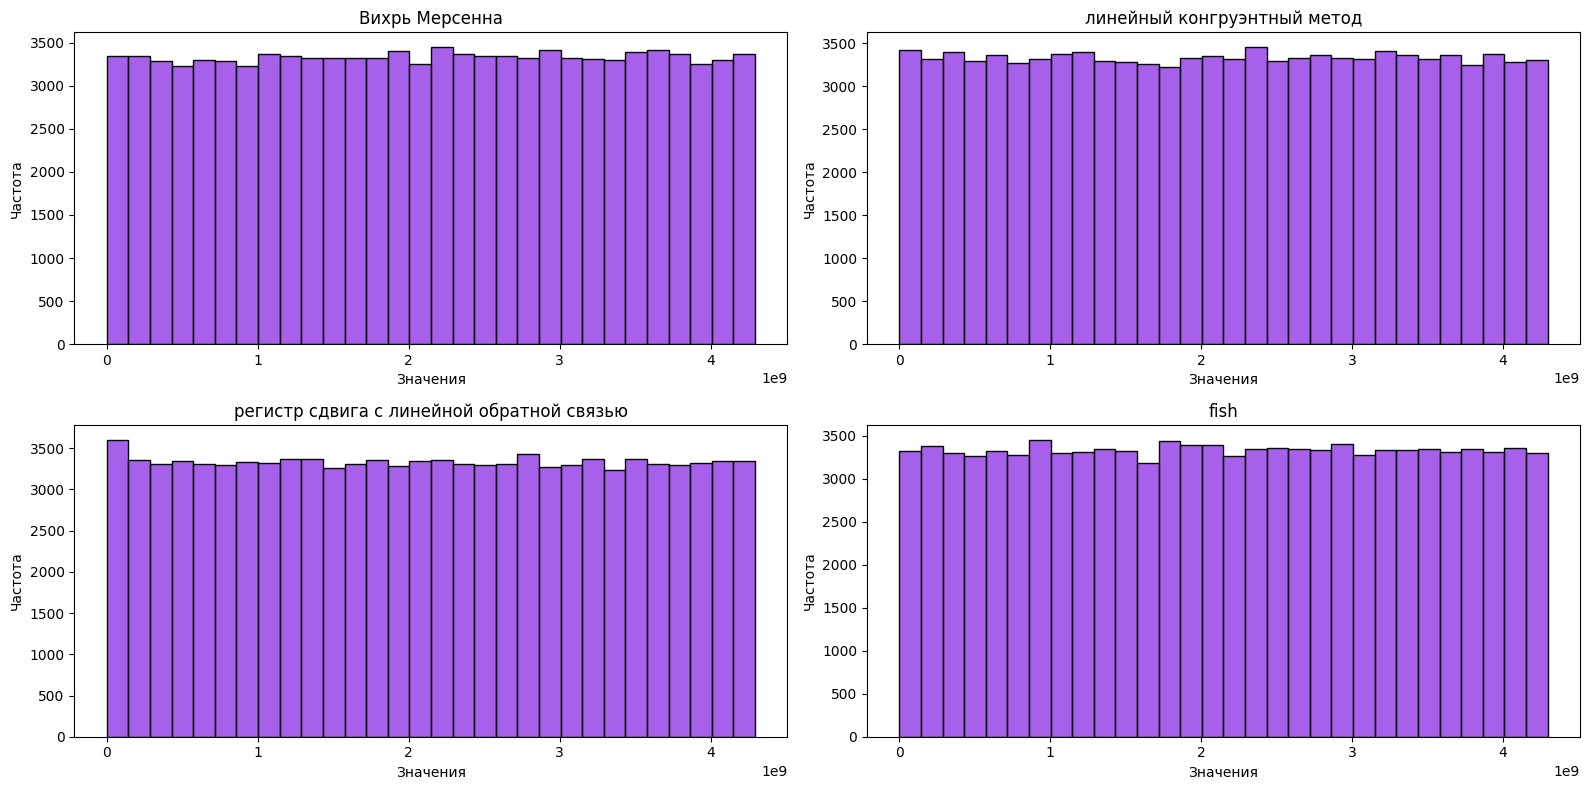

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(["#8a2be2"])
# Настройка фигуры
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Названия графиков
titles = ["Вихрь Мерсенна", "линейный конгруэнтный метод", "регистр сдвига с линейной обратной связью", "fish"]

# Построение графиков
for i, ax in enumerate(axes.flat):
    sns.histplot(sequences[i], bins=30, kde=False, ax=ax,)
    ax.set_title(titles[i])  # Установка названия графика
    ax.set_xlabel("Значения")
    ax.set_ylabel("Частота")

# Настройка расстояний между графиками
plt.tight_layout()
plt.show()


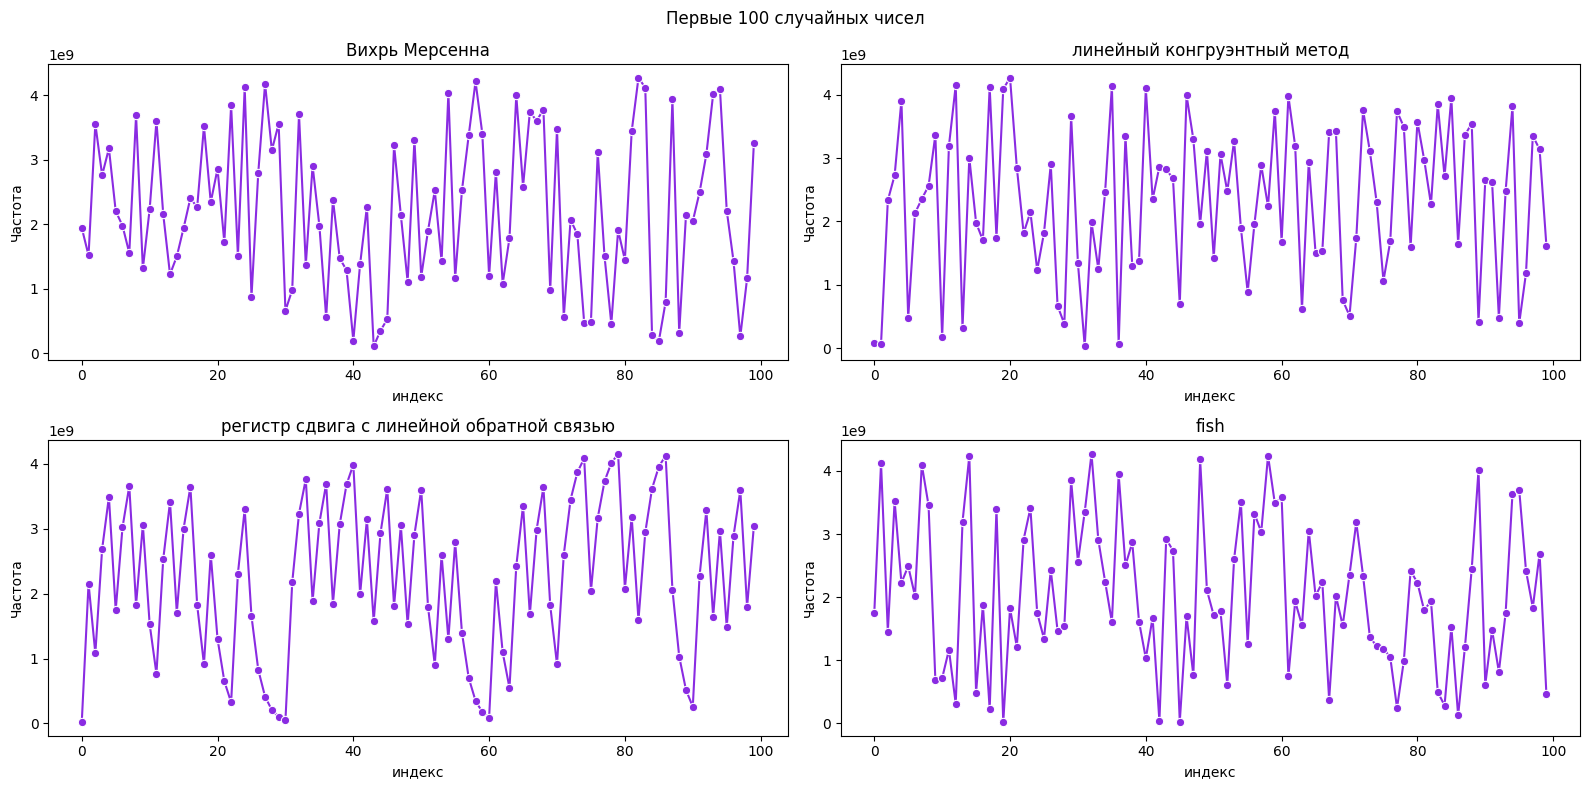

In [20]:
# Настройка фигуры
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle("Первые 100 случайных чисел")
# Названия графиков
titles = ["Вихрь Мерсенна", "линейный конгруэнтный метод", "регистр сдвига с линейной обратной связью", "fish"]

# Построение графиков
for i, ax in enumerate(axes.flat):
    seq = sequences[i][:100]
    sns.lineplot(x=range(len(seq)),y=seq, ax=ax, marker = 'o')  
    ax.set_title(titles[i])  # Установка названия графика
    ax.set_xlabel("индекс")
    ax.set_ylabel("Частота")

# Настройка расстояний между графиками
plt.tight_layout()
plt.show()


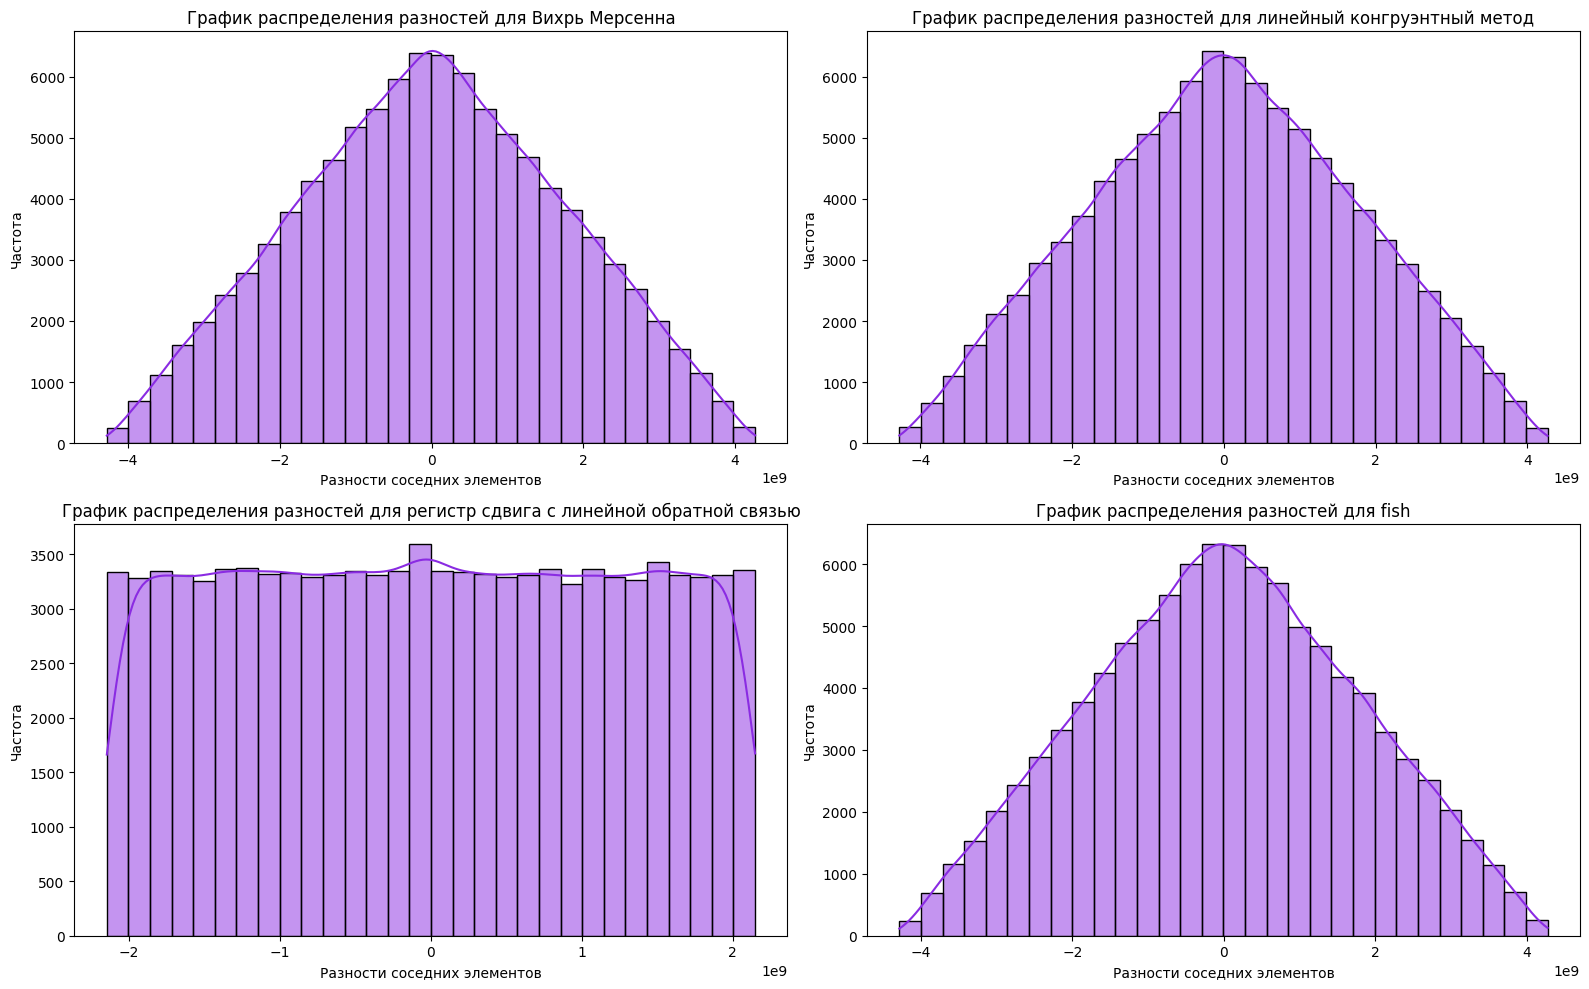

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(16, 10))
# Создание графиков
for i, seq in enumerate(sequences):
    plt.subplot(2, 2, i+1)
    
    # Вычисление разностей соседних элементов
    diffs = np.diff(seq)
    
    # Построение графика распределения разностей
    sns.histplot(diffs, kde=True, bins=30)
    plt.title(f'График распределения разностей для {titles[i]}')
    plt.xlabel('Разности соседних элементов')
    plt.ylabel('Частота')

# Отображение графиков
plt.tight_layout()
plt.show()


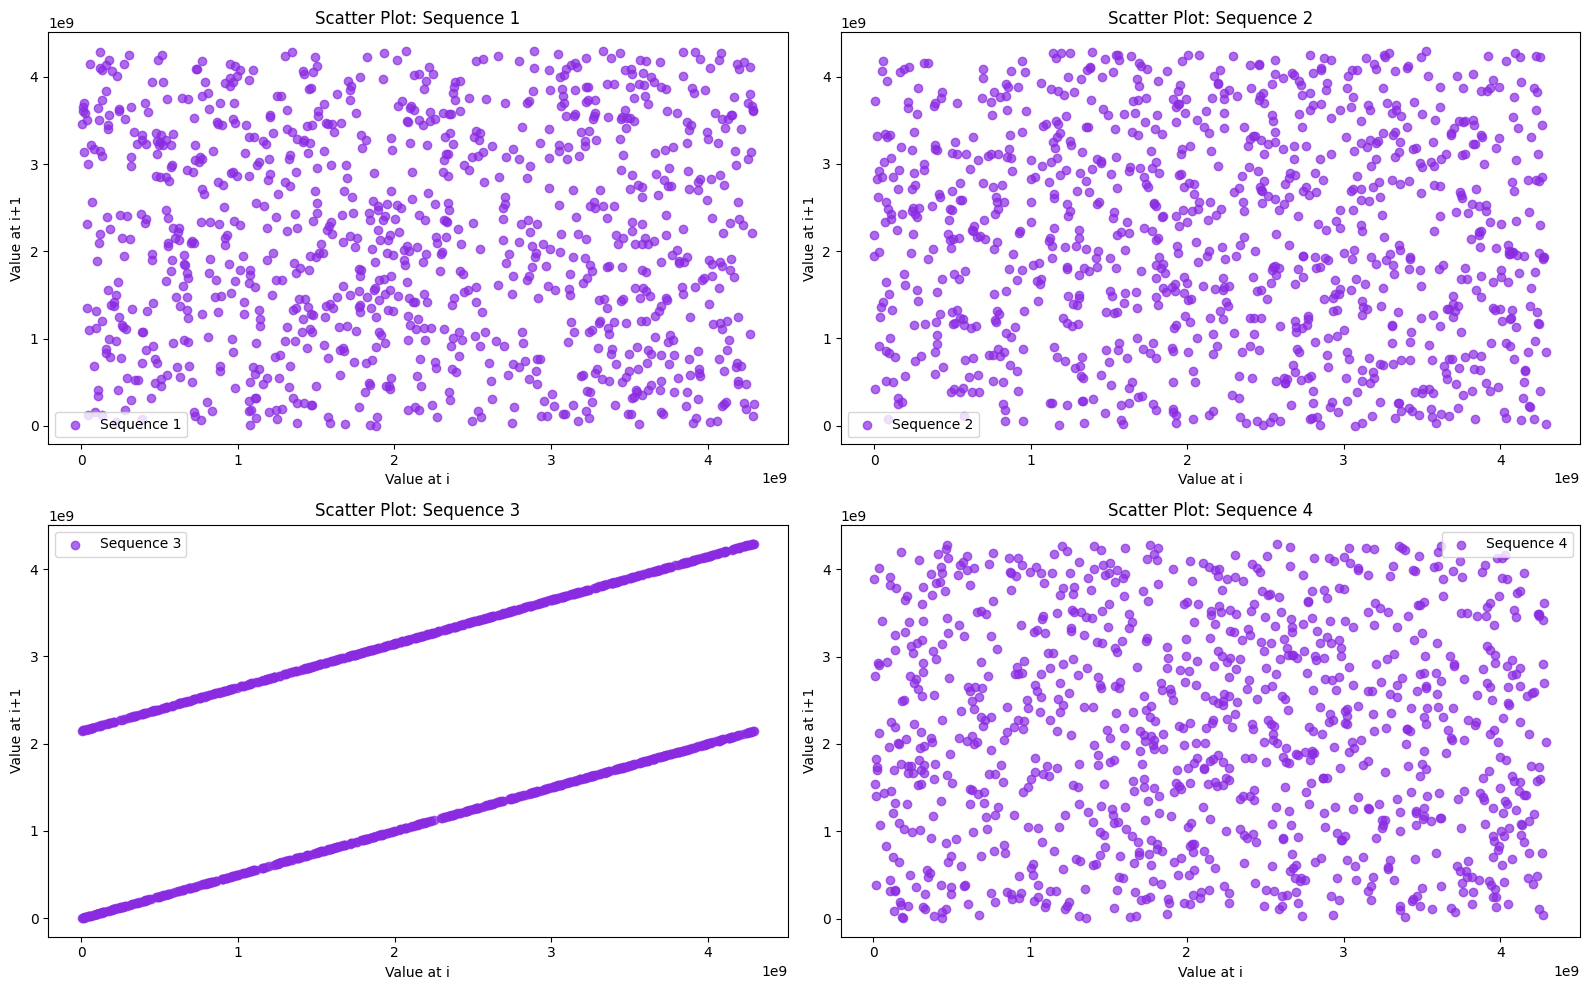

In [22]:

# Настроим фигуру
plt.figure(figsize=(16, 10))

# График 1: Скаттерплот соседних значений для каждого списка
for i, seq in enumerate(sequences):
    seq = seq[:1000]
    plt.subplot(2, 2, i+1)  # Размещение в 2x2 сетке
    plt.scatter(seq[:-1], seq[1:], label=f'Sequence {i+1}', alpha=0.7)
    plt.title(f'Scatter Plot: Sequence {i+1}')
    plt.xlabel('Value at i')
    plt.ylabel('Value at i+1')
    plt.legend()

plt.tight_layout()
plt.show()


######################### Вихрь Мерсенна ################################
frequency_bit_test - p-value (0.1603035796112237, 444, 1.4040512811147603)
frequency_block_test - p-value 0.002458942384248938
test_runs - p-value 0.6263205347995635
spectral_test - p-value 0.24915675396217268 наблюдаемые пики 47467 ожидаемые пики 47500.0


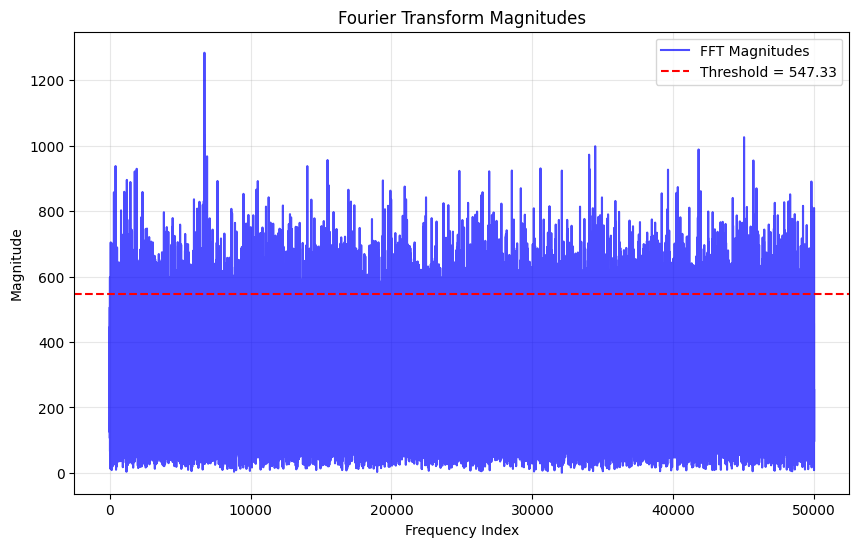

######################### линейный конгруэнтный метод ################################
frequency_bit_test - p-value (1.0, 0, 0.0)
frequency_block_test - p-value 0.0
test_runs - p-value 0.0
spectral_test - p-value 0.0 наблюдаемые пики 50000 ожидаемые пики 47500.0


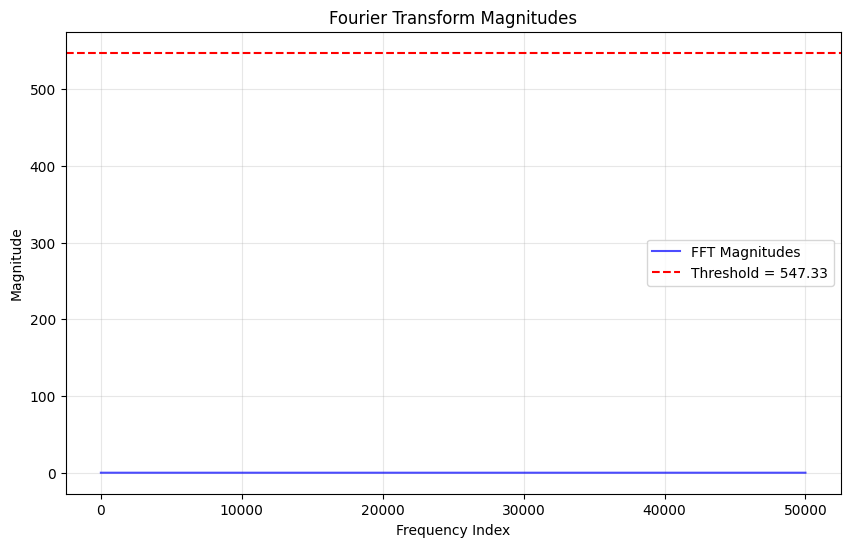

######################### регистр сдвига с линейной обратной связью ################################
frequency_bit_test - p-value (0.31765919676225096, -316, 0.9992797406132078)
frequency_block_test - p-value 0.000895098282603644
test_runs - p-value 0.32536749344889593
spectral_test - p-value 0.06190611191066603 наблюдаемые пики 47575 ожидаемые пики 47500.0


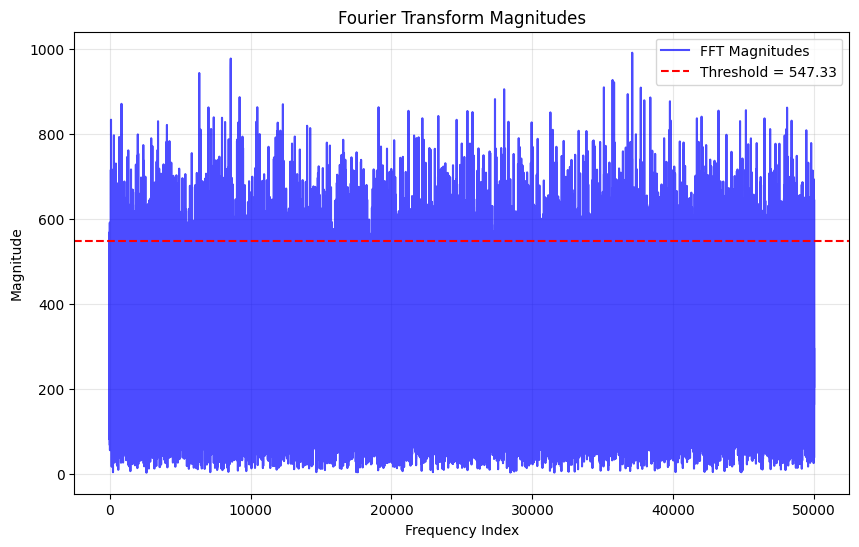

######################### fish ################################
frequency_bit_test - p-value (0.934472390504046, 26, 0.08221921916437785)
frequency_block_test - p-value 0.0006505853935274113
test_runs - p-value 0.9495536935614532
spectral_test - p-value 0.379119731807456 наблюдаемые пики 47485 ожидаемые пики 47500.0


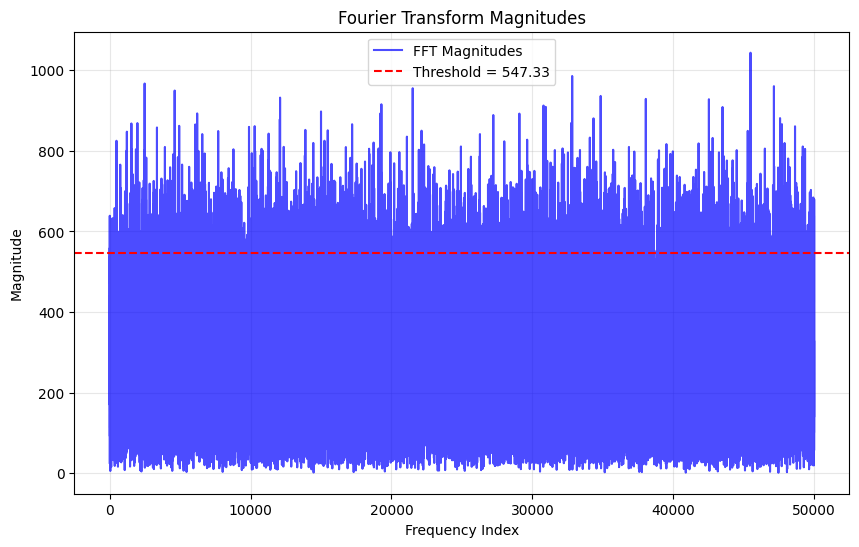

In [28]:
for i in range(4):
    seq = sequences[i]
    bits = ''.join([str(num & 1) for num in seq])
    print('#########################',titles[i],'################################')
    tests.print_all_tests(bits)
